In [ ]:
import pandas as pd

df = pd.read_csv('../data/cleaned_df.csv')
df.head()

,user_id,order_id,correct,answer_type,attempt_count,hint_count,overlap_time,skill_name_split
0,77912,20223948,1.0,algebra,1,0,95637,['Effect of Changing Dimensions of a Shape Pro...
1,77912,20223955,1.0,choose_1,1,0,227226,['Effect of Changing Dimensions of a Shape Pro...
2,77912,20223963,1.0,choose_1,1,0,165891,['Effect of Changing Dimensions of a Shape Pro...
3,77912,20223971,1.0,choose_1,1,0,129112,['Effect of Changing Dimensions of a Shape Pro...
4,77912,20223984,1.0,choose_1,1,0,87127,['Addition Whole Numbers']


In [ ]:
user_counts = df['user_id'].value_counts()
max_freq = user_counts.max()
min_freq = user_counts.min()
avg_freq = user_counts.mean()
print(f"Max frequency of user_id: {max_freq}")
print(f"Min frequency of user_id: {min_freq}")
print(f"Avg frequency of user_id: {avg_freq:.2f}")

Max frequency of user_id: 1036
Min frequency of user_id: 10
Avg frequency of user_id: 87.96


In [ ]:
df.shape

(549020, 8)

In [ ]:

df = df.sort_values(['user_id', 'order_id'])
df.head()

,user_id,order_id,correct,answer_type,attempt_count,hint_count,overlap_time,skill_name_split
450658,26787,34955672,1.0,algebra,1,0,12044,['Unit Rate']
450659,26787,34955681,1.0,algebra,1,0,3728,['Interior Angles Triangle']
450660,26787,34955693,1.0,algebra,1,0,4241,['Complementary and Supplementary Angles']
450661,26787,34955702,1.0,algebra,1,0,4161,['Table']
450662,26787,34955716,1.0,algebra,1,0,7674,['Calculations with Similar Figures']


In [ ]:
answer_type_ohe = pd.get_dummies(df['answer_type'], prefix='answer_type', dtype=int)

df = pd.concat([df, answer_type_ohe], axis=1)

df.head()

,user_id,order_id,correct,answer_type,attempt_count,hint_count,overlap_time,skill_name_split,answer_type_algebra,answer_type_choose_1,answer_type_fill_in_1
450658,26787,34955672,1.0,algebra,1,0,12044,['Unit Rate'],1,0,0
450659,26787,34955681,1.0,algebra,1,0,3728,['Interior Angles Triangle'],1,0,0
450660,26787,34955693,1.0,algebra,1,0,4241,['Complementary and Supplementary Angles'],1,0,0
450661,26787,34955702,1.0,algebra,1,0,4161,['Table'],1,0,0
450662,26787,34955716,1.0,algebra,1,0,7674,['Calculations with Similar Figures'],1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for col in ['overlap_time', 'hint_count', 'attempt_count']:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

df[['overlap_time', 'hint_count', 'attempt_count']].head()

,overlap_time,hint_count,attempt_count
450658,0.003549,0.0,0.000419
450659,0.003539,0.0,0.000419
450660,0.003540,0.0,0.000419
450661,0.003540,0.0,0.000419
450662,0.003544,0.0,0.000419


Prepare Sequences

In [ ]:
# 1. Get all unique skills from all arrays in 'skill_name_split'
all_skills = [
  "* () positive reals",
  "-",
  "/",
  "Absolute Value",
  "Addition Whole Numbers",
  "Addition and Subtraction Fractions",
  "Addition and Subtraction Integers",
  "Addition and Subtraction Positive Decimals",
  "Algebraic Simplification",
  "Algebraic Solving",
  "Angles - Acute",
  "Angles - Obtuse",
  "Angles - Right",
  "Angles on Parallel Lines Cut by a Transversal",
  "Area Circle",
  "Area Irregular Figure",
  "Area Parallelogram",
  "Area Rectangle",
  "Area Trapezoid",
  "Area Triangle",
  "Box and Whisker",
  "Calculation with + - * /",
  "Calculations with Similar Figures",
  "Choose an Equation from Given Information",
  "Circle Graph",
  "Circumference",
  "Coefficient",
  "Combinatorics",
  "Combining Like Terms",
  "Commutative Property",
  "Complementary and Supplementary Angles",
  "Composition of Function Adding",
  "Compound Interest",
  "Computation with Real Numbers",
  "Congruence",
  "Conversion of Fraction Decimals Percents",
  "Counting Methods",
  "Definition Pi",
  "Distributive Property",
  "Divisibility Rules",
  "Division Fractions",
  "Division Whole Numbers",
  "Effect of Changing Dimensions of a Shape Proportionally",
  "English and Metric Terminology",
  "Equal As Balance Concept",
  "Equation Solving More Than Two Steps",
  "Equation Solving Two or Fewer Steps",
  "Equivalent Fractions",
  "Estimation",
  "Expanded",
  "Exponent",
  "Exponents",
  "Factoring Trinomials",
  "Finding Max and Min from a Quadratic Equation",
  "Finding Percents",
  "Finding Ratios",
  "Finding Slope From Equation",
  "Finding Slope From Situation",
  "Finding Slope from Graph",
  "Finding Slope from Ordered Pairs",
  "Finding fractions and ratios",
  "Finding y-intercept from Linear Equation",
  "Finding y-intercept from Linear Situation",
  "Fraction Of",
  "Geometric Definitions",
  "Graph Shape",
  "Graphing Inequalities on a number line",
  "Greatest Common Factor",
  "Histogram as Table or Graph",
  "Intercept",
  "Interior Angles Figures with More than 3 Sides",
  "Interior Angles Triangle",
  "Inverse Relations",
  "Least Common Multiple",
  "Line Plot",
  "Line Symmetry",
  "Line of Best-Fit",
  "Linear Equations",
  "Linear area volume conversion",
  "Mean",
  "Mean-Median-Mode-Range Differentiation",
  "Median",
  "Mode",
  "Monomial",
  "Multiplication Fractions",
  "Multiplication Whole Numbers",
  "Multiplication and Division Integers",
  "Multiplication and Division Positive Decimals",
  "Multiplying Monomials",
  "Multiplying non Monomial Polynomials",
  "Nets of 3D Figures",
  "Number Line",
  "Order of Operations",
  "Order of Operations All",
  "Ordering Fractions",
  "Ordering Integers",
  "Ordering Positive Decimals",
  "Ordering Real Numbers",
  "Ordering Whole Numbers",
  "Parallel and Perpendicular Lines",
  "Parallel and Perpendicular Slopes",
  "Parts of a Polyomial",
  "Pattern Finding",
  "Percent Discount",
  "Percent Increase or Decrease",
  "Percent Of",
  "Percents",
  "Perimeter of a Polygon",
  "Picking Equation and Inequality from Choices",
  "Point Plotting",
  "Polynomial Factors",
  "Prime Number",
  "Probability of Two Distinct Events",
  "Probability of a Single Event",
  "Properties and Classification Quadrilaterals",
  "Properties and Classification Rectangular Prisms",
  "Properties and Classification Triangles",
  "Properties of Numbers",
  "Proportion",
  "Pythagorean Theorem",
  "Quadratic Equation Solving",
  "Range",
  "Rate",
  "Reading a Ruler or Scale",
  "Recognize Linear Pattern",
  "Recognizing Equivalent Expressions",
  "Reflection",
  "Rotations",
  "Rounding",
  "Sampling Techniques",
  "Scale Factor",
  "Scatter Plot",
  "Scientific Notation",
  "Similar Figures",
  "Simplifying Expressions positive exponents",
  "Slope",
  "Solve Quadratic Equations Using Factoring",
  "Solving Inequalities",
  "Solving System of Equation",
  "Solving Systems of Linear Equations",
  "Solving for a variable",
  "Square Root",
  "Square Roots",
  "Standard and Word Notation",
  "Stem and Leaf Plot",
  "Substitution",
  "Subtraction Whole Numbers",
  "Surface Area Cylinder",
  "Surface Area Rectangular Prism",
  "Surface Area Sphere",
  "Surface Area of 3D Objects",
  "Symbolization",
  "Table",
  "Terms",
  "Transformation",
  "Translations",
  "Understanding Concept of Probabilities",
  "Unit Conversion Standard to Metric",
  "Unit Conversion Within a System",
  "Unit Rate",
  "Variable",
  "Venn Diagram",
  "Volume Cone",
  "Volume Cylinder",
  "Volume Prism",
  "Volume Pyramid",
  "Volume Rectangular Prism",
  "Volume Sphere",
  "Volume of 3D Objects",
  "Write Linear Equation from Graph",
  "Write Linear Equation from Ordered Pairs",
  "Write Linear Equation from Situation",
  "Writing Expression from Diagrams",
  "X-Y Graph Reading"
]
skill2id = {skill: idx for idx, skill in enumerate(all_skills)}

# 2. Map each skill array to an array of skill_ids
df['skill_ids'] = df['skill_name_split'].apply(lambda skills: [skill2id[s] for s in skills if s in skill2id])

num_skills = len(all_skills)
print(f"Number of unique skills: {num_skills}")

# 3. Create question_type_id
df['question_type_id'] = pd.Categorical(df['answer_type']).codes
num_question_types = df['question_type_id'].nunique()
print(f"Number of unique question types: {num_question_types}")



Number of unique skills: 174
Number of unique question types: 3


In [8]:
import ast

if isinstance(df['skill_name_split'].iloc[0], str):
    df['skill_name_split'] = df['skill_name_split'].apply(ast.literal_eval)

# Now this will work as intended:
df['skill_ids'] = df['skill_name_split'].apply(lambda skills: [skill2id[s] for s in skills if s in skill2id])

In [9]:

print(df[['skill_ids', 'skill_name_split', 'question_type_id', 'answer_type']].tail(20))

       skill_ids                                 skill_name_split  \
535982     [119]                            [Pythagorean Theorem]   
535983       [5]             [Addition and Subtraction Fractions]   
535984     [119]                            [Pythagorean Theorem]   
535985     [145]                                   [Substitution]   
535986      [87]  [Multiplication and Division Positive Decimals]   
535987     [119]                            [Pythagorean Theorem]   
535988     [119]                            [Pythagorean Theorem]   
535989     [119]                            [Pythagorean Theorem]   
535990     [119]                            [Pythagorean Theorem]   
535991     [119]                            [Pythagorean Theorem]   
535992     [109]                                 [Point Plotting]   
535993     [119]                            [Pythagorean Theorem]   
535994     [145]                                   [Substitution]   
535995      [87]  [Multiplication 

In [15]:
%pip install --user tf-keras

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [16]:
# Test the import after installation
from tf_keras.preprocessing.sequence import pad_sequences
print("✅ tf_keras imported successfully!")


✅ tf_keras imported successfully!
✅ tf_keras imported successfully!


In [22]:
from tf_keras.preprocessing.sequence import pad_sequences
import numpy as np

def prepare_dkt_sequences(df, num_skills=num_skills, max_seq_len=50, 
                          extra_features_cols=['attempt_count', 'hint_count', 'overlap_time']):
    """
    Prepares student interaction sequences for DKT-style LSTM input.
    Handles multiple skills per sample by encoding each skill separately.
    """
    input_seqs = []
    output_seqs = []
    extras = []

    grouped = df.sort_values('order_id').groupby('user_id')

    for _, group in grouped:
        x_seq = []
        y_seq = []
        extras_seq = []

        skill_ids_list = group['skill_ids'].values
        corrects = group['correct'].values
        question_types = group['question_type_id'].values
        extra_features = group[extra_features_cols].iloc[1:].values.tolist() if extra_features_cols else None

        for i in range(len(skill_ids_list) - 1):
            skills = skill_ids_list[i]
            correct = int(corrects[i] > 0.5)
            qtype = int(question_types[i])
            next_skills = skill_ids_list[i+1]
            next_correct = corrects[i+1]

            for skill in skills:
                # Ensure we're working with standard Python int, not numpy int8
                x_encoded = int(skill) + correct * num_skills + qtype * num_skills * 2
                x_seq.append(x_encoded)

            y_vec = np.zeros(num_skills, dtype=np.float32)
            for next_skill in next_skills:
                y_vec[next_skill-1] = next_correct
            y_seq.append(y_vec)

            if extra_features_cols:
                extras_seq.append(extra_features[i] if i < len(extra_features) else [0]*len(extra_features_cols))

        # Split long sequences into chunks of max_seq_len
        for start in range(0, len(x_seq), max_seq_len):
            end = start + max_seq_len
            input_seqs.append(x_seq[start:end])
            output_seqs.append(y_seq[start:end])
            if extra_features_cols:
                extras.append(extras_seq[start:end])

    # Use int32 to handle larger encoded values
    X_input = pad_sequences(input_seqs, padding='post', maxlen=max_seq_len, dtype='int32')
    Y_output = pad_sequences(output_seqs, padding='post', maxlen=max_seq_len, dtype='float32')

    extra_inputs = None
    if extra_features_cols:
        extra_inputs = pad_sequences(extras, padding='post', maxlen=max_seq_len, dtype='float32')

    # Print encoding distribution for debug
    import collections
    all_encodings = [enc for seq in input_seqs for enc in seq]
    encoding_counts = collections.Counter(all_encodings)
    print(f"\nTop 20 most common input encodings (skill+correct+qtype):")
    for k, v in encoding_counts.most_common(20):
        print(f"Encoding {k}: {v} times")
    print(f"\nLeast 20 input encodings (skill+correct+qtype):")
    for k, v in encoding_counts.most_common()[-20:]:
        print(f"Encoding {k}: {v} times")
    print(f"Total unique input encodings: {len(encoding_counts)}")
    print(f"Max encoding value: {max(all_encodings)}")
    print(f"Min encoding value: {min(all_encodings)}")

    return X_input, Y_output, extra_inputs

In [19]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [23]:
import tensorflow as tf
from tf_keras.models import Model
from tf_keras.layers import Input, Embedding, LSTM, Dense, Concatenate, TimeDistributed
from tf_keras.layers import Bidirectional
from tf_keras.layers import Dropout
from tf_keras.optimizers import Adam
from tf_keras.initializers import Constant
from tf_keras.callbacks import EarlyStopping
      

def build_dkt_model(
    num_skills=num_skills,
    num_extra_features=3,
    num_question_types=3,
    embedding_dim=32,
    lstm_units=80,
    use_bilstm=True,
    dropout_rate=0.3,
    learning_rate=0.002,
    pretrained_skill_embeddings=None,  # shape: (num_total_inputs, embedding_dim)
    trainable=False,
    use_extra_input=True
):
    num_total_inputs = num_skills * 2 * num_question_types

    # Inputs
    skill_input = Input(shape=(None,), name='skill_input')
    inputs = [skill_input]

    if pretrained_skill_embeddings is not None:
        skill_embed = Embedding(
            input_dim=num_total_inputs,
            output_dim=embedding_dim,
            embeddings_initializer=Constant(pretrained_skill_embeddings),
            trainable=trainable,
            name='pretrained_skill_embedding'
        )(skill_input)
    else:
        skill_embed = Embedding(
            input_dim=num_total_inputs,
            output_dim=embedding_dim,
            name='skill_embedding'
        )(skill_input)

    if use_extra_input:
        extra_input = Input(shape=(None, num_extra_features), name='extra_input')
        inputs.append(extra_input)
        merged_input = Concatenate(name='concat_inputs')([skill_embed, extra_input])
    else:
        merged_input = skill_embed

    merged_input = Dropout(dropout_rate)(merged_input)

    if use_bilstm:
        lstm_out = Bidirectional(
            LSTM(units=lstm_units, return_sequences=True, dropout=dropout_rate),
            name='bilstm_layer'
        )(merged_input)
    else:
        lstm_out = LSTM(units=lstm_units, return_sequences=True, dropout=dropout_rate, name='lstm_layer')(merged_input)

    predictions = TimeDistributed(Dense(num_skills, activation='sigmoid'), name='predictions')(lstm_out)

    optimizer = Adam(learning_rate=learning_rate)
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC', 'Accuracy', 'Precision', 'Recall'])

    return model

In [24]:
X, y, extras = prepare_dkt_sequences(df, max_seq_len=50)


Top 20 most common input encodings (skill+correct+qtype):
Encoding 624: 7500 times
Encoding 276: 5643 times
Encoding 528: 5632 times
Encoding 640: 5612 times
Encoding 292: 5195 times
Encoding 450: 4266 times
Encoding 667: 4157 times
Encoding 635: 4100 times
Encoding 102: 4014 times
Encoding 609: 3724 times
Encoding 674: 3714 times
Encoding 319: 3711 times
Encoding 587: 3710 times
Encoding 118: 3659 times
Encoding 466: 3574 times
Encoding 326: 3276 times
Encoding 576: 3238 times
Encoding 261: 3195 times
Encoding 180: 3098 times
Encoding 287: 3089 times

Least 20 input encodings (skill+correct+qtype):
Encoding 749: 2 times
Encoding 762: 2 times
Encoding 513: 2 times
Encoding 740: 2 times
Encoding 831: 2 times
Encoding 425: 2 times
Encoding 597: 2 times
Encoding 1019: 2 times
Encoding 323: 2 times
Encoding 863: 1 times
Encoding 375: 1 times
Encoding 723: 1 times
Encoding 27: 1 times
Encoding 75: 1 times
Encoding 934: 1 times
Encoding 773: 1 times
Encoding 765: 1 times
Encoding 939: 1 tim

In [25]:
X.shape

(14100, 50)

In [26]:
y.shape

(14100, 50, 174)

In [27]:
extras.shape

(14100, 50, 3)

In [28]:
from sklearn.model_selection import train_test_split

# Split into train and validation sets (80/20 split)
X_train, X_val, y_train, y_val, extras_train, extras_val = train_test_split(
    X, y, extras, test_size=0.25, random_state=42
)

print(f"Train shapes: X={X_train.shape}, y={y_train.shape}, extras={extras_train.shape}")
print(f"Validation shapes: X={X_val.shape}, y={y_val.shape}, extras={extras_val.shape}")


Train shapes: X=(10575, 50), y=(10575, 50, 174), extras=(10575, 50, 3)
Validation shapes: X=(3525, 50), y=(3525, 50, 174), extras=(3525, 50, 3)


Main student agent

In [41]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Binary Crossentropy")
    plt.legend()

    # AUC - handle both uppercase and lowercase metric names
    plt.subplot(1, 2, 2)
    auc_key = 'auc' if 'auc' in history.history else 'AUC'
    val_auc_key = 'val_auc' if 'val_auc' in history.history else 'val_AUC'
    
    plt.plot(history.history[auc_key], label='Train AUC')
    plt.plot(history.history[val_auc_key], label='Val AUC')
    plt.title("AUC over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()

    plt.tight_layout()
    plt.show()


Create text embedding for DKT

In [30]:
df['correct'] = (df['correct'] > 0.5).astype(int)

# Build skill_texts for all possible input encodings (for embedding matrix)
skill_texts = []
question_type_names = list(df['answer_type'].astype(str).unique())
for skill_id in range(num_skills):
    for correct in [0, 1]:
        for qtype in range(num_question_types):
            skill_name = all_skills[skill_id]
            qtype_name = question_type_names[qtype] if qtype < len(question_type_names) else str(qtype)
            skill_texts.append(f"Skill: {skill_name}, Correct: {correct}, Question Type: {qtype_name}")

skill_texts

['Skill: * () positive reals, Correct: 0, Question Type: algebra',
 'Skill: * () positive reals, Correct: 0, Question Type: fill_in_1',
 'Skill: * () positive reals, Correct: 0, Question Type: choose_1',
 'Skill: * () positive reals, Correct: 1, Question Type: algebra',
 'Skill: * () positive reals, Correct: 1, Question Type: fill_in_1',
 'Skill: * () positive reals, Correct: 1, Question Type: choose_1',
 'Skill: -, Correct: 0, Question Type: algebra',
 'Skill: -, Correct: 0, Question Type: fill_in_1',
 'Skill: -, Correct: 0, Question Type: choose_1',
 'Skill: -, Correct: 1, Question Type: algebra',
 'Skill: -, Correct: 1, Question Type: fill_in_1',
 'Skill: -, Correct: 1, Question Type: choose_1',
 'Skill: /, Correct: 0, Question Type: algebra',
 'Skill: /, Correct: 0, Question Type: fill_in_1',
 'Skill: /, Correct: 0, Question Type: choose_1',
 'Skill: /, Correct: 1, Question Type: algebra',
 'Skill: /, Correct: 1, Question Type: fill_in_1',
 'Skill: /, Correct: 1, Question Type: cho

In [36]:
%pip install --user transformers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [37]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

# Load transformer model and tokenizer
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()

def get_embeddings(texts, batch_size=32):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        with torch.no_grad():
            encoded_input = tokenizer(batch, padding=True, truncation=True, return_tensors="pt")
            model_output = model(**encoded_input)
            embeddings = model_output.last_hidden_state.mean(dim=1)
            all_embeddings.append(embeddings.cpu().numpy())
    return np.vstack(all_embeddings)

pretrained_skill_embeddings = get_embeddings(skill_texts)
print("pretrained_skill_embeddings shape:", pretrained_skill_embeddings.shape)

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pretrained_skill_embeddings shape: (1044, 384)


Trainable Text Embeddings

In [38]:
trainable_text_emb_dkt_model = build_dkt_model(
    embedding_dim=pretrained_skill_embeddings.shape[1],
    pretrained_skill_embeddings=pretrained_skill_embeddings,
    lstm_units=128, use_bilstm=True, learning_rate=0.002, trainable=True, use_extra_input=False
)
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, min_delta=0.0002)
history = trainable_text_emb_dkt_model.fit(
    x={'skill_input': X_train},
    y=y_train,
    batch_size=32,
    epochs=15, 
    validation_data=({'skill_input': X_val,}, y_val),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/15
Epoch 1/15




331/331 [==============================] - 23s 60ms/step - loss: 0.0257 - auc: 0.6987 - Accuracy: 0.0221 - precision: 0.0025 - recall: 0.0027 - val_loss: 0.0152 - val_auc: 0.7739 - val_Accuracy: 0.0304 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
331/331 [==============================] - 23s 60ms/step - loss: 0.0257 - auc: 0.6987 - Accuracy: 0.0221 - precision: 0.0025 - recall: 0.0027 - val_loss: 0.0152 - val_auc: 0.7739 - val_Accuracy: 0.0304 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
331/331 [==============================] - 17s 51ms/step - loss: 0.0138 - auc: 0.8254 - Accuracy: 0.0717 - precision: 0.8476 - recall: 0.0025 - val_loss: 0.0121 - val_auc: 0.8717 - val_Accuracy: 0.1094 - val_precision: 0.8923 - val_recall: 0.0249
Epoch 3/15
331/331 [==============================] - 17s 51ms/step - loss: 0.0138 - auc: 0.8254 - Accuracy: 0.0717 - precision: 0.8476 - recall: 0.0025 - val_loss: 0.0121 - val_auc: 0.8717 - va

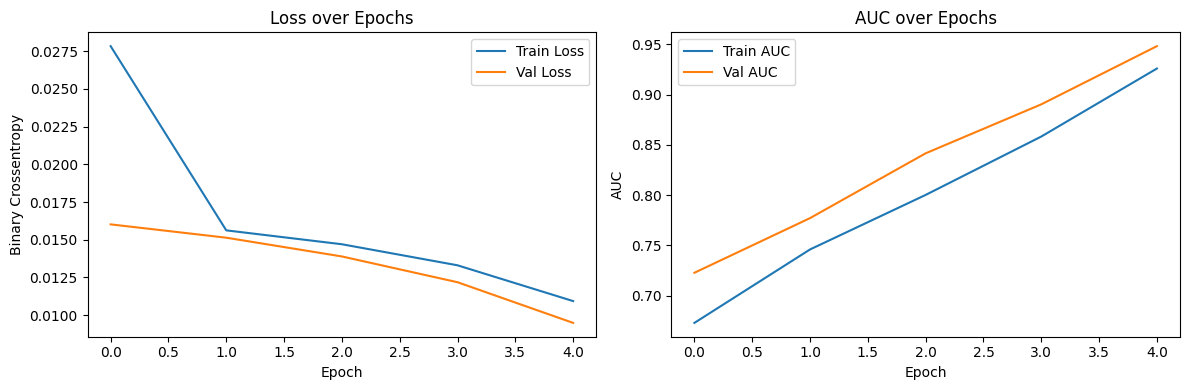

In [42]:
plot_history(history)

In [44]:
from itertools import product

embedding_dims = [64, 128]
lstm_units_list = [64, 128]
bilstm_options = [True]
batch_sizes = [16, 32]
use_extra_input_options = [False] # Since we won't simulate student agent's time spent, hint used, attempt count to keeep it simple
embedding_type_options = ['standard', 'pretrained']
dropout_rate_options = [0.2, 0.3]
trainable_options = [True]
learning_rate_options = [0.0025, 0.002] 

results = []
tried_configs = set()

for emb_type, emb_dim, lstm_units, use_bilstm, batch_size, use_extra_input, dropout_rate, trainable, learning_rate in product(
    embedding_type_options, embedding_dims, lstm_units_list, bilstm_options, batch_sizes, use_extra_input_options, dropout_rate_options, trainable_options, learning_rate_options
):
    # Only use trainable option for pretrained embeddings, standard always trainable
    if emb_type == 'pretrained':
        emb_dim = pretrained_skill_embeddings.shape[1]
        pretrained_emb = pretrained_skill_embeddings
        trainable_flag = trainable
    else:
        pretrained_emb = None
        trainable_flag = True  # Standard embedding should always be trainable

    # Build a tuple of the config to avoid repeats
    config_tuple = (
        emb_type, emb_dim, lstm_units, use_bilstm, batch_size, use_extra_input, dropout_rate, trainable_flag, learning_rate
    )
    if config_tuple in tried_configs:
        continue
    tried_configs.add(config_tuple)

    print(f"\nTraining with embedding_type={emb_type}, embedding_dim={emb_dim}, lstm_units={lstm_units}, use_bilstm={use_bilstm}, batch_size={batch_size}, use_extra_input={use_extra_input}, dropout_rate={dropout_rate}, trainable={trainable_flag}, learning_rate={learning_rate}")
    model = build_dkt_model(
        num_skills=num_skills,
        num_extra_features=3,
        num_question_types=num_question_types,
        embedding_dim=emb_dim,
        lstm_units=lstm_units,
        use_bilstm=use_bilstm,
        use_extra_input=use_extra_input,
        pretrained_skill_embeddings=pretrained_emb,
        dropout_rate=dropout_rate,
        trainable=trainable_flag,
        learning_rate=learning_rate
    )
    early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

    if use_extra_input:
        fit_inputs = {'skill_input': X_train, 'extra_input': extras_train}
        val_inputs = {'skill_input': X_val, 'extra_input': extras_val}
    else:
        fit_inputs = {'skill_input': X_train}
        val_inputs = {'skill_input': X_val}

    history = model.fit(
        x=fit_inputs,
        y=y_train,
        batch_size=batch_size,
        epochs=5,  # Used fewer epochs for quick test
        validation_data=(val_inputs, y_val),
        callbacks=[early_stop],
        verbose=0
    )
    
    # Handle both uppercase and lowercase metric names
    auc_key = 'val_auc' if 'val_auc' in history.history else 'val_AUC'
    acc_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_Accuracy'
    precision_key = 'val_precision' if 'val_precision' in history.history else 'val_Precision'
    recall_key = 'val_recall' if 'val_recall' in history.history else 'val_Recall'
    
    best_val_auc = max(history.history[auc_key])
    best_val_acc = max(history.history[acc_key])
    best_val_precision = max(history.history[precision_key])
    best_val_recall = max(history.history[recall_key])
    print(f"Best val_AUC: {best_val_auc:.4f}")
    print(f"Best val_accuracy: {best_val_acc:.4f}")
    print(f"Best val_precision: {best_val_precision:.4f}")
    print(f"Best val_recall: {best_val_recall:.4f}")

    results.append({
        'embedding_type': emb_type,
        'embedding_dim': emb_dim,
        'lstm_units': lstm_units,
        'use_bilstm': use_bilstm,
        'batch_size': batch_size,
        'use_extra_input': use_extra_input,
        'dropout_rate': dropout_rate,
        'trainable': trainable_flag,
        'learning_rate': learning_rate,
        'best_val_auc': best_val_auc,
        'best_val_accuracy': best_val_acc,
        'best_val_precision': best_val_precision,
        'best_val_recall': best_val_recall,
        'history': history  # Store history for plotting
    })


Training with embedding_type=standard, embedding_dim=64, lstm_units=64, use_bilstm=True, batch_size=16, use_extra_input=False, dropout_rate=0.2, trainable=True, learning_rate=0.0025
Best val_AUC: 0.9498
Best val_accuracy: 0.1366
Best val_precision: 0.9138
Best val_recall: 0.0634

Training with embedding_type=standard, embedding_dim=64, lstm_units=64, use_bilstm=True, batch_size=16, use_extra_input=False, dropout_rate=0.2, trainable=True, learning_rate=0.002
Best val_AUC: 0.9498
Best val_accuracy: 0.1366
Best val_precision: 0.9138
Best val_recall: 0.0634

Training with embedding_type=standard, embedding_dim=64, lstm_units=64, use_bilstm=True, batch_size=16, use_extra_input=False, dropout_rate=0.2, trainable=True, learning_rate=0.002
Best val_AUC: 0.9509
Best val_accuracy: 0.1210
Best val_precision: 0.9203
Best val_recall: 0.0542

Training with embedding_type=standard, embedding_dim=64, lstm_units=64, use_bilstm=True, batch_size=16, use_extra_input=False, dropout_rate=0.3, trainable=Tru

MemoryError: Unable to allocate 351. MiB for an array with shape (10575, 50, 174) and data type float32


Top grid search results:
{'embedding_type': 'pretrained', 'embedding_dim': 384, 'lstm_units': 128, 'use_bilstm': True, 'batch_size': 16, 'use_extra_input': False, 'dropout_rate': 0.2, 'trainable': True, 'learning_rate': 0.0025, 'best_val_auc': 0.9482298493385315, 'best_val_accuracy': 0.19698913395404816, 'best_val_precision': 0.9929577708244324, 'best_val_recall': 0.1834796816110611}
{'embedding_type': 'pretrained', 'embedding_dim': 384, 'lstm_units': 128, 'use_bilstm': True, 'batch_size': 16, 'use_extra_input': False, 'dropout_rate': 0.3, 'trainable': True, 'learning_rate': 0.0025, 'best_val_auc': 0.9461361169815063, 'best_val_accuracy': 0.2103779911994934, 'best_val_precision': 1.0, 'best_val_recall': 0.23287804424762726}
{'embedding_type': 'pretrained', 'embedding_dim': 384, 'lstm_units': 128, 'use_bilstm': True, 'batch_size': 16, 'use_extra_input': False, 'dropout_rate': 0.3, 'trainable': True, 'learning_rate': 0.002, 'best_val_auc': 0.9407541751861572, 'best_val_accuracy': 0.2093

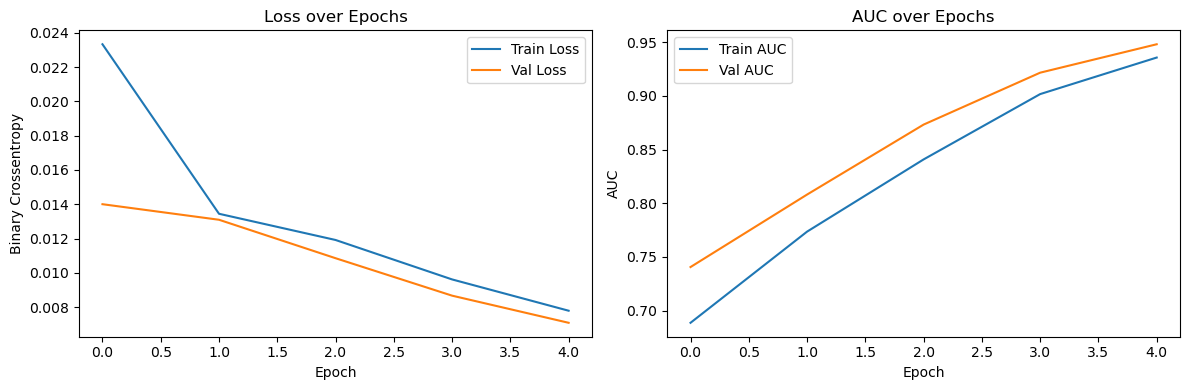

In [ ]:
# Show sorted results
results = sorted(results, key=lambda x: x['best_val_auc'], reverse=True)
print("\nTop grid search results:")
for r in results[:5]:  # Show top 5
    print({k: v for k, v in r.items() if k != 'history'})

# Example: plot the history of the best run
best_history = results[0]['history']
plot_history(best_history)

Epoch 1/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 0.6206 - Accuracy: 0.0118 - Precision: 0.0019 - Recall: 0.0134 - loss: 0.0606 - val_AUC: 0.7594 - val_Accuracy: 0.0163 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.0140
Epoch 2/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 0.7626 - Accuracy: 0.0162 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.0137 - val_AUC: 0.7925 - val_Accuracy: 0.0249 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.0133
Epoch 3/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 0.8131 - Accuracy: 0.0297 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.0128 - val_AUC: 0.8570 - val_Accuracy: 0.0463 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.0118
Epoch 4/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 0.8743 - Accuracy: 0.0598 - Precision: 0.5035 - Recall: 7.5618e-04 - loss: 0.0112 - val_AUC: 0.9089 - val_Accuracy: 0.1019 - val_Precision: 0.9923 - val_Recall: 0.0084 - 

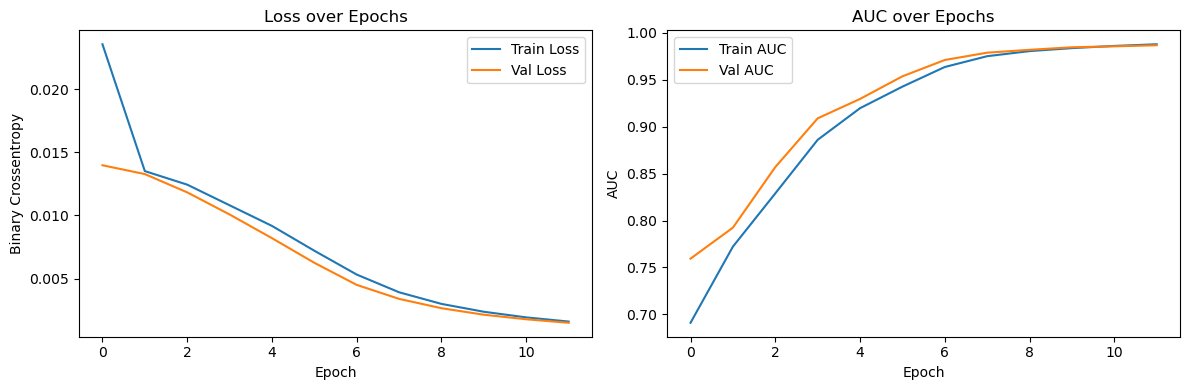

In [ ]:
model = build_dkt_model(
    num_skills=num_skills,
    num_extra_features=3,
    num_question_types=num_question_types,
    embedding_dim=384,
    lstm_units=128,
    use_bilstm=True,
    use_extra_input=False,
    pretrained_skill_embeddings=pretrained_skill_embeddings,
    dropout_rate=0.2,
    trainable=True,
    learning_rate=0.0025
)
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
fit_inputs = {'skill_input': X_train}
val_inputs = {'skill_input': X_val}

history = model.fit(
    x=fit_inputs,
    y=y_train,
    batch_size=16,
    epochs=12,
    validation_data=(val_inputs, y_val),
    callbacks=[early_stop],
    verbose=1
)

plot_history(history)

Tuning max sequence length hyperparameter

In [ ]:
# Calculate the 90th percentile of unique interactions per student
interaction_counts = df.groupby('user_id').size()
percentile_90 = interaction_counts.quantile(0.9)
print(f"90th percentile of unique interactions per student: {percentile_90:.2f}")

90th percentile of unique interactions per student: 229.90


In [ ]:
max_seq_lens = [50, 100, 150, 200, 250]
seq_results = []
save_dir = '../models'

for max_seq_len in max_seq_lens:
    print(f"\nTesting max_seq_len={max_seq_len}")
    X_seq, y_seq, extras_seq = prepare_dkt_sequences(df, max_seq_len=max_seq_len)
    X_train_seq, X_val_seq, y_train_seq, y_val_seq = train_test_split(
        X_seq, y_seq, test_size=0.25, random_state=42
    )
    fit_inputs_seq = {'skill_input': X_train_seq}
    val_inputs_seq = {'skill_input': X_val_seq}

    model_seq = build_dkt_model(
        num_skills=num_skills,
        num_extra_features=3,
        num_question_types=num_question_types,
        embedding_dim=384,
        lstm_units=128,
        use_bilstm=True,
        use_extra_input=False,
        pretrained_skill_embeddings=pretrained_skill_embeddings,
        dropout_rate=0.2,
        trainable=True,
        learning_rate=0.0025
    )
    early_stop_seq = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    history_seq = model_seq.fit(
        x=fit_inputs_seq,
        y=y_train_seq,
        batch_size=16,
        epochs=12,
        validation_data=(val_inputs_seq, y_val_seq),
        callbacks=[early_stop_seq],
        verbose=1
    )
    
    # Handle both uppercase and lowercase metric names
    auc_key = 'val_auc' if 'val_auc' in history_seq.history else 'val_AUC'
    best_val_auc = max(history_seq.history[auc_key])
    
    print(f"Best val_AUC for max_seq_len={max_seq_len}: {best_val_auc:.4f}")
    seq_results.append({'max_seq_len': max_seq_len, 'best_val_auc': best_val_auc, 'history': history_seq})

    # Save model for this sequence length
    model_seq.save(f'{save_dir}/dkt_model_pretrained_seq{max_seq_len}.keras')


Testing max_seq_len=50

Top 20 most common input encodings (skill+correct+qtype):
Encoding 624: 7500 times
Encoding 276: 5643 times
Encoding 528: 5632 times
Encoding 640: 5612 times
Encoding 292: 5195 times
Encoding 450: 4266 times
Encoding 667: 4157 times
Encoding 635: 4100 times
Encoding 102: 4014 times
Encoding 609: 3724 times
Encoding 674: 3714 times
Encoding 319: 3711 times
Encoding 587: 3710 times
Encoding 118: 3659 times
Encoding 466: 3574 times
Encoding 326: 3276 times
Encoding 576: 3238 times
Encoding 261: 3195 times
Encoding 180: 3098 times
Encoding 287: 3089 times

Least 20 input encodings (skill+correct+qtype):
Encoding 749: 2 times
Encoding 762: 2 times
Encoding 513: 2 times
Encoding 740: 2 times
Encoding 831: 2 times
Encoding 425: 2 times
Encoding 597: 2 times
Encoding 1019: 2 times
Encoding 323: 2 times
Encoding 863: 1 times
Encoding 375: 1 times
Encoding 723: 1 times
Encoding 27: 1 times
Encoding 75: 1 times
Encoding 934: 1 times
Encoding 773: 1 times
Encoding 765: 1 t

MemoryError: Unable to allocate 1.11 GiB for an array with shape (6837, 250, 174) and data type float32

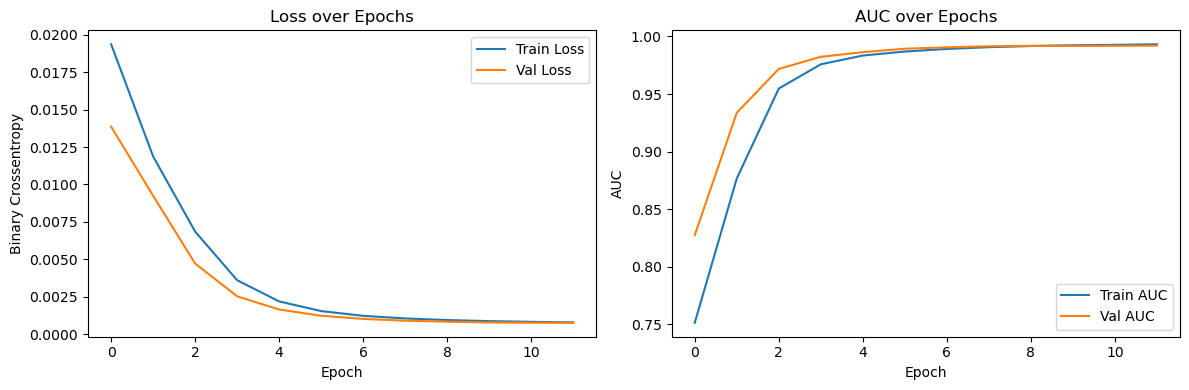

In [ ]:
# Optionally plot the best one
best_seq = max(seq_results, key=lambda x: x['best_val_auc'])
plot_history(best_seq['history'])

In [ ]:
save_dir = '../models'
model.save(f'{save_dir}/dkt_model_pretrained_new_sanskar.keras')

In [ ]:
model.save(f'{save_dir}/dkt_model_pretrained_new_sanskar.h5')

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
print("Dataset size:", df.shape[0])
print("Unique students:", df['user_id'].nunique())
print("Number of unique skills:", num_skills)
print("Top 5 skills:\n", df['skill_name_split'].explode().value_counts().head())
print("Number of unique question types:", num_question_types)
print("Question type distribution:\n", df['answer_type'].value_counts())
print("Overall correctness rate:", df['correct'].mean())
print("overlap_time: min", df['overlap_time'].min(), "max", df['overlap_time'].max())
print("hint_count: min", df['hint_count'].min(), "max", df['hint_count'].max())
print("attempt_count: min", df['attempt_count'].min(), "max", df['attempt_count'].max())
print("Avg seq len per student:", df.groupby('user_id').size().mean())
print("Max seq len per student:", df.groupby('user_id').size().max())
print("Min seq len per student:", df.groupby('user_id').size().min())

Dataset size: 549020
Unique students: 6242
Number of unique skills: 174
Top 5 skills:
 skill_name_split
Pattern Finding                      26927
Proportion                           22840
Addition and Subtraction Integers    17707
Probability of a Single Event        16672
Substitution                         16113
Name: count, dtype: int64
Number of unique question types: 3
Question type distribution:
 answer_type
choose_1     234369
algebra      201179
fill_in_1    113472
Name: count, dtype: int64
Overall correctness rate: 0.5735583403154711
overlap_time: min 0.0 max 1.0
hint_count: min 0.0 max 1.0
attempt_count: min 0.0 max 1.0
Avg seq len per student: 87.95578340275553
Max seq len per student: 1036
Min seq len per student: 10
